In [ ]:
# Statistics for the State of California 
    # Narrow in on one state 
    # State income of people graduating

In [11]:
import pandas as pd
import os
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
DF1 = pd.read_csv("merged_final.csv")

In [23]:
DF1

,Unnamed: 0,unitid,wmearn_unitid,geo_fips,instnm.x,stabbr.x,geo_stabbr,linkedin_flagd,pginmsa,pginstate,...,ofgrt_a,floan_p,floan_a,oloan_p,oloan_a,undergrad_tot,TexERU,hdi_unitid,sevcrime_unitid,wminc2020st_unitid
0,1,100654,46951.675680,12.0,Alabama A & M University,AL,FL,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.123530
1,2,100654,46951.675680,25.0,Alabama A & M University,AL,MA,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.123530
2,3,100654,46951.675680,48.0,Alabama A & M University,AL,TX,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.123530
3,4,100654,46951.675680,36.0,Alabama A & M University,AL,NY,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.123530
4,5,100654,46951.675680,24.0,Alabama A & M University,AL,MD,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.123530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83039,83040,440828,67596.951106,50.0,Oregon State University-Cascades Campus,OR,VT,1,61.233993,81.606519,...,NaN,NaN,NaN,NaN,NaN,812,0,0.92881,181.373753,37703.641397
83040,83041,440828,67596.951106,51.0,Oregon State University-Cascades Campus,OR,VA,1,61.233993,81.606519,...,NaN,NaN,NaN,NaN,NaN,812,0,0.92881,181.373753,37703.641397
83041,83042,440828,67596.951106,53.0,Oregon State University-Cascades Campus,OR,WA,1,61.233993,81.606519,...,NaN,NaN,NaN,NaN,NaN,812,0,0.92881,181.373753,37703.641397
83042,83043,440828,67596.951106,54.0,Oregon State University-Cascades Campus,OR,WV,1,61.233993,81.606519,...,NaN,NaN,NaN,NaN,NaN,812,0,0.92881,181.373753,37703.641397


In [24]:
# Number of graduates from the state of CA in 2021

filtered_DF1 = DF1[(DF1['stabbr.x'] == 'CA')]

    # Count the number of graduates
num_graduates = len(filtered_DF1)

print(f"Number of people who graduated from the state of CA in 2021: {num_graduates}")



Number of people who graduated from the state of CA in 2021: 5408


In [15]:
# What university had the most gruduates? 
DF1_ca = DF1[DF1['stabbr.x'] == 'CA']
graduate_counts_ca = DF1_ca.groupby('instnm.x').size()

max_graduates_ca = graduate_counts_ca.max()
top_university_ca = graduate_counts_ca.idxmax()

print(f"The university with the most graduates in CA is {top_university_ca} with {max_graduates_ca} graduates.")



The university with the most graduates in CA is American Conservatory Theater with 52 graduates.


In [34]:
# Which major was the most common?
try:
    DF1_ca = DF1[DF1['stabbr.x'] == 'CA']

    major_counts = DF1_ca['unitid'].value_counts()
    most_common_major = major_counts.idxmax()
    most_common_major_count = major_counts.max()

    print(f"The most common major in CA is {most_common_major} with {most_common_major_count} occurrences.")
except KeyError as e:
    print(f"Key error, check column names: {e}")


The most common major in CA is 109086 with 52 occurrences.


In [50]:
# Which schools have the highest tuition rates?
DF1_ca = DF1[DF1['stabbr.x'] == 'CA']
sorted_DF1 = DF1_ca.sort_values(by='tuition3', ascending=False)

top_schools = sorted_DF1[['instnm.x', 'tuition3']].head(10)
print("Top schools in CA by tuition are:")
print(top_schools)

Top schools in CA by tuition are:
                       instnm.x  tuition3
7018  Samuel Merritt University   55944.0
6992  Samuel Merritt University   55944.0
6990  Samuel Merritt University   55944.0
6989  Samuel Merritt University   55944.0
6988  Samuel Merritt University   55944.0
6987  Samuel Merritt University   55944.0
6986  Samuel Merritt University   55944.0
6985  Samuel Merritt University   55944.0
6984  Samuel Merritt University   55944.0
6983  Samuel Merritt University   55944.0


In [79]:
print(top_n_schools)

   Unnamed: 0  unitid  wmearn_unitid  geo_fips  \
0       82472  409698   69805.179918      39.0   
1        3816  110547   70867.048306      29.0   
2        3815  110547   70867.048306      18.0   
3        3814  110547   70867.048306      20.0   
4        3813  110547   70867.048306      53.0   
5        3812  110547   70867.048306       9.0   
6        3811  110547   70867.048306      25.0   
7        3817  110547   70867.048306       4.0   
8        3810  110547   70867.048306      21.0   
9        3808  110547   70867.048306      56.0   

                                      instnm.x stabbr.x geo_stabbr  \
0     California State University-Monterey Bay       CA         OH   
1  California State University-Dominguez Hills       CA         MO   
2  California State University-Dominguez Hills       CA         IN   
3  California State University-Dominguez Hills       CA         KS   
4  California State University-Dominguez Hills       CA         WA   
5  California State Universit

In [80]:
all_data = pd.read_csv("merged_final.csv")

In [81]:
for i in sorted(all_data.columns):
    print(i)

TexERU
Unnamed: 0
X10yrgrowthrate
X10yrgrowthrateinc
admssn
admssnm
admssnw
agrnt_a
agrnt_p
alum_uscount
alum_uscovered
anyaidn
anyaidp
applcn
applcnm
applcnw
avginstate
avgmktwage
avgtotfrosh
barrons
c15basic
carnegie
ccbasic
city
control
deg1count
deg2count
deg3count
deg4count
deg5count
deg6count
deggrant
degtotcount
dfrcgid
dfrcuscg
distance_w
earn_by_unitid
em_allemploy_tot
em_allfaculty_tot
em_gradasst_tot
em_nonfaculty_tot
em_nontenfac_tot
em_otherfac_tot
em_tenurefac_tot
endowment_beg
endowment_end
enrlft
enrlm
enrlt
enrlw
fee2
fee3
fee6
fee7
fgrnt_a
fgrnt_p
fips
floan_a
floan_p
fteug10to18
geo_count_state
geo_count_state_adj
geo_fips
geo_stabbr
gr_grads_1
gr_grads_10
gr_grads_5
gr_instate_1
gr_instate_10
gr_instate_5
gr_rate_all
gr_rate_asia
gr_rate_blac
gr_rate_hisp
gr_rate_men
gr_rate_nati
gr_rate_nres
gr_rate_unkw
gr_rate_whit
gr_rate_wom
groffer
hbcu
hdi
hdi_unitid
hhi
hloffer
iclevel
igrnt_a
igrnt_p
inexpfte_avg
inst_cbsa
inst_cbsatype
inst_ccbasic
inst_city
inst_control
i

<Axes: xlabel='instnm.x'>

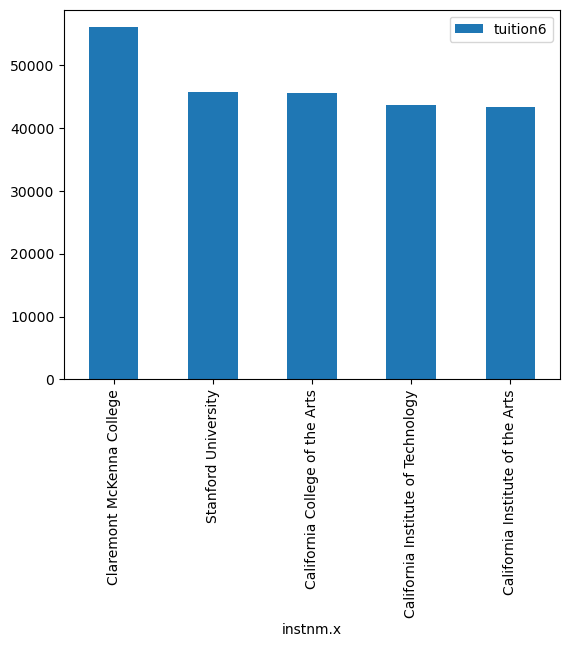

In [82]:
ca_data = all_data[all_data['stabbr.x'] == 'CA'][['instnm.x', 'tuition6']].drop_duplicates().sort_values('tuition6', ascending=False).reset_index(drop=1)
ca_data.iloc[:5,:].plot(x='instnm.x', y='tuition6', kind='bar')

In [54]:
print(DF1

       Unnamed: 0  unitid  wmearn_unitid  geo_fips  \
0               1  100654   46951.675680      12.0   
1               2  100654   46951.675680      25.0   
2               3  100654   46951.675680      48.0   
3               4  100654   46951.675680      36.0   
4               5  100654   46951.675680      24.0   
...           ...     ...            ...       ...   
83039       83040  440828   67596.951106      50.0   
83040       83041  440828   67596.951106      51.0   
83041       83042  440828   67596.951106      53.0   
83042       83043  440828   67596.951106      54.0   
83043       83044  440828   67596.951106      55.0   

                                      instnm.x stabbr.x geo_stabbr  \
0                     Alabama A & M University       AL         FL   
1                     Alabama A & M University       AL         MA   
2                     Alabama A & M University       AL         TX   
3                     Alabama A & M University       AL         NY   
4

AttributeError: 'Axes' object has no attribute 'show'

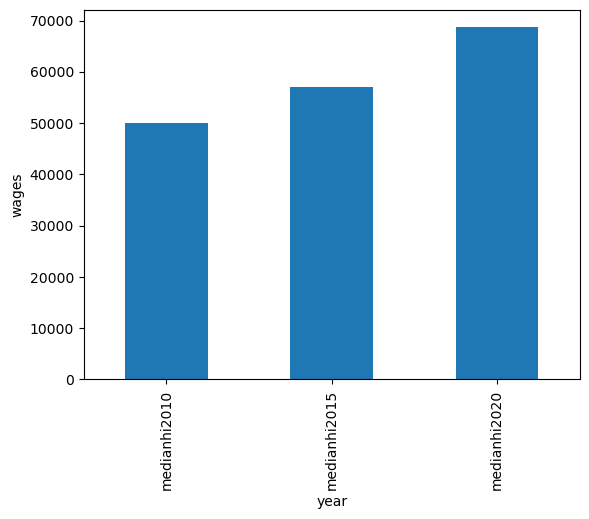

In [65]:
# Graph showing the income differences between 2021, 2015, 2020

my_chart = DF1[['medianhi2010', 'medianhi2015', 'medianhi2020']].mean().plot(kind= 'bar')

my_chart.set_xlabel('year')
my_chart.set_ylabel('wages')

my_chart.show 

In [86]:
from sklearn.linear_model import LinearRegression

<Figure size 1000x600 with 0 Axes>

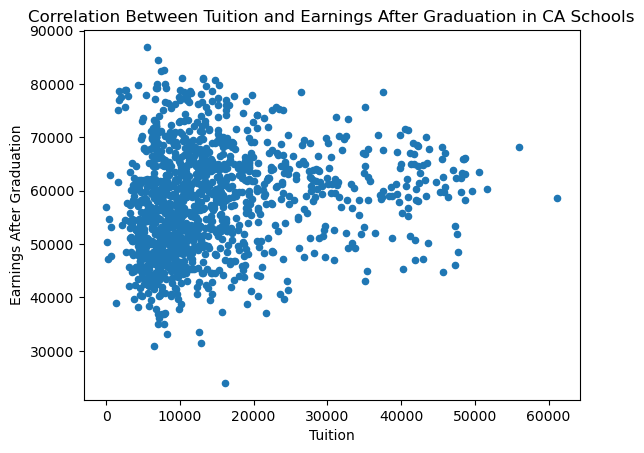

In [95]:
tuition_earnings = all_data[['instnm.x','wmearn_unitid','tuition6']].drop_duplicates()
# Create a scatter plot to show the correlation between tuition fees and earnings after graduation
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=DF1_ca, x='tuition3', y='wmearn_unitid', alpha=0.6, edgecolor='none')
tuition_earnings.plot(y='wmearn_unitid', x='tuition6', kind='scatter')
# Add title and labels
plt.title('Correlation Between Tuition and Earnings After Graduation in CA Schools')
plt.xlabel('Tuition')
plt.ylabel('Earnings After Graduation')

# Fit line to visually assess correlation
#sns.regplot(data=DF1_ca, x='tuition3', y='wmearn_unitid', scatter=False, color='red')
plt.show()

mearn_unitid = tuition6.loc[(mearn_unitid["type"]=="Earnings") & (tuition6["type"]=="Tuition"), "number"]
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(
    year, diesel_cars)
d_fit = d_slope * year + d_int
plt.scatter(mearn_unitid,tuition6)
plt.plot(mearn_unitid,tuition6,"--")
plt.xticks(year, rotation=90)